In [ ]:
#!pip install pytesseract 
#!pip install opencv 
#!pip install numpy as np
#!pip install pillow
#!pip install postal

In [1]:
import pytesseract 
from PIL import Image, ImageOps
import numpy as np
# from postal.parser import parse_address

In [6]:

def extract_text(url):
    import pytesseract 
    from PIL import Image
    
    """extracts test out of image
    --inputs= image_url """
    #opening the image
    im=Image.open(url)
    grey= im.convert(mode="L")
    threshold= 160
    image=grey.point(lambda x: 255 if x > threshold else 0)
    
    #configuration for pytesseract to operate with text extraction
    config = ('-l eng --oem 1 --psm 3')
    text = pytesseract.image_to_string(image, config=config)
    
    return text

In [154]:
image=(r"images/large-receipt-image-dataset-SRD/1012-receipt.jpg")
text=extract_text(image)
print (text)

#14

HP Pho Ga
8930 Mission Dr. #102
pp ooee 91770
Phone (626)268-9999

 
     

bate: Apr 01, 2019 Time; 05:

Server: Admin

Bill; 59980 Table : 14

1 Pho Ga (Small) 8.00

1 Pho Ga (Large) 9.00

1 Gor Cuon 5.25
“Subtotal 22.25
TAX 211
Total 24.36
8. Service Gharge- 40% 8.90

Total $33 26

Suggested Tip : 15% (3,65)

18% (4.38)

20% (4.87)
Open Time : Apr 01, 2019 04:39PM
Printed By : Admin

Thank you for Coming !



# Image cleaning and cropping function
-- this function performs the following transformations 

---- resize to 640,480
n\
---- BGR to grey
n\
---- Apply GaussianBlur (5,5),1
n\
---- Uses adaptive threshold (guissan Binary)
n\
---- dialate the image
n\
---- erode 
n\
---- find contours
n\
---- apply contours
n\
---- crop image based and contours and save them 

In [4]:


def clean_image(pathImage):
    import cv2
    import numpy as np
    import utlis

    #cap.set(10,160)
    heightImg = 1920
    widthImg  = 1080

    
    #pathImage = r"images/large-receipt-image-dataset-SRD/1013-receipt.jpg"

    img = cv2.imread(pathImage)
    img = cv2.resize(img, (widthImg, heightImg)) # RESIZE IMAGE
    imgBlank = np.zeros((heightImg,widthImg, 3), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGING IF REQUIRED
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
    imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR
    #thres=utlis.valTrackbars() # GET TRACK BAR VALUES FOR THRESHOLDS
    imgThreshold = cv2.adaptiveThreshold(imgBlur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2) # APPLY CANNY BLUR
    kernel = np.ones((5, 5))
    imgDial = cv2.dilate(imgThreshold, kernel, iterations=2) # APPLY DILATION
    imgThreshold = cv2.erode(imgDial, kernel, iterations=1)  # APPLY EROSION

        ## FIND ALL COUNTOURS
    imgContours = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
    imgBigContour = img.copy() # COPY IMAGE FOR DISPLAY PURPOSES
    contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS
    cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS


        # FIND THE BIGGEST COUNTOUR
    biggest, maxArea = utlis.biggestContour(contours) # FIND THE BIGGEST CONTOUR
    if biggest.size != 0:
            biggest=utlis.reorder(biggest)
            cv2.drawContours(imgBigContour, biggest, -1, (0, 255, 0), 20) # DRAW THE BIGGEST CONTOUR
            imgBigContour = utlis.drawRectangle(imgBigContour,biggest,2)
            pts1 = np.float32(biggest) # PREPARE POINTS FOR WARP
            pts2 = np.float32([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
            matrix = cv2.getPerspectiveTransform(pts1, pts2)
            imgWarpColored = cv2.warpPerspective(img, matrix, (widthImg, heightImg))

            #REMOVE 20 PIXELS FORM EACH SIDE
            imgWarpColored=imgWarpColored[20:imgWarpColored.shape[0] - 20, 20:imgWarpColored.shape[1] - 20]
            imgWarpColored = cv2.resize(imgWarpColored,(widthImg,heightImg))
           
    count=1
    cv2.imwrite("Scanned/myImage"+str(count)+".jpg",imgWarpColored)
    item_name=("Scanned/myImage"+str(count)+".jpg")
    return item_name



In [49]:
item=clean_image(r"images/large-receipt-image-dataset-SRD/1084-receipt.jpg")
import functions 
print (functions.extract_text(item))

Trattoria Sort

328 Washingtonstreet
Hoboken, Nd
201-533-1801

TABLE # 4
CHECK# 27273

ae ae 9:93:48 PM
e

SERVER: Gaston
STATION: 01

Item Count: 4

1 STUFFED nee

1 BK FETT AL PORCINI *
1 COSTOLETTE/ALLA/PAP#
1 BROCCOLI RABE W/ GAM

| ESPRESSO
1 DBLD ESPRESSO

Sot
GRAND TOT

Opened: 7/1/2018 5:53:48 PM

$117.7
8,24

"
‘10.



In [1]:
import functions 

In [1]:
import os 
ls=[]
url=r"images/large-receipt-image-dataset-SRD/"
for filename in os.listdir(url):
    f = os.path.join(url, filename)
   
    ls.append(f)

In [2]:
ls.pop(0)


'images/large-receipt-image-dataset-SRD/.ipynb_checkpoints'

In [3]:
import pandas as pd 
import os 
import functions

texts=[]
dfl=[]

for i in ls :
    #text=functions.extract_from_image(i)
    image=functions.clean_image(i)
    text=functions.extract_text(image)
    texts.append(text)
    df=functions.extract_data(text)
    dfl.append(df)
df1=pd.concat(dfl)       
df     
    

,Zipcode,Latitude,Longitude,Address,prices,time
0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print(texts[22])
df=pd.DataFrame()

Mooustat Resta: arit

AT D REPRINT 1
2332 n #2406

th.
Ay be one, aa aa
Na opt Ge
view 6% vheee

TOTE. : 37,37

AHL

 



In [31]:
df1

,Zipcode,Latitude,Longitude,Address,prices,time
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,90280,-118.2013,33.9462,10 GARFIELD AVE.,$9,11:19AM
...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,$5,NaN
0,NaN,NaN,NaN,NaN,NaN,6:06
0,454003,NaN,NaN,NaN,NaN,12:41
0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
for i in df.columns:
    print("The VALUES of "+ i + str(df1[i].isna().value_counts()))

The VALUES of ZipcodeFalse    105
True      95
Name: Zipcode, dtype: int64
The VALUES of LatitudeTrue     139
False     61
Name: Latitude, dtype: int64
The VALUES of LongitudeTrue     139
False     61
Name: Longitude, dtype: int64
The VALUES of AddressTrue     152
False     48
Name: Address, dtype: int64
The VALUES of pricesTrue     137
False     63
Name: prices, dtype: int64
The VALUES of timeTrue     126
False     74
Name: time, dtype: int64


In [9]:
df.to_csv("data\imporved_data_structured.csv")

In [49]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, ' isna on dataset with otsu thresholding')

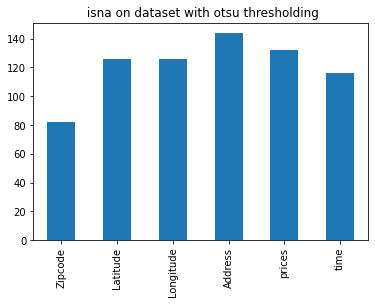

In [55]:
df.isna().sum().plot(kind = 'bar')
plt.title(" isna on dataset with otsu thresholding")

In [37]:
print(texts[23])

Tha

GUSTO

Thai Gusto Restaurant
2011 Hewitt Ave
Everett WA 98201
Tei. 425-252-3525 Fax. 425-252-3525

Helcome to Thai Gusto

  
  
 

Table 4
Date: 6/16/2017 12:36 PM
Server: PRACH (TY
Chang (26$3.50) $7.00
$19.24

#114 Garlic Delight
[Chicken] (5e¥##81 [Smal] Browr: Rice!
$10

4128 Red Curry
[Chicken] [5##+#*] [Sma'i Brown Rice]

Tota] 4 item(s)

Sales Tax

Grand Total $20.15

Tip Guide
r6y=64.52, 184=85.43, 2048.03

Thank you very much.
Come back aga)”.

~ GUEST crete -
This is not a “ere ce.

 



In [8]:
with open(r'data/newtext2oem3psm6.txt', 'w',encoding="utf-8") as fp:
    for item in texts:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


NameError: name 'plt' is not defined

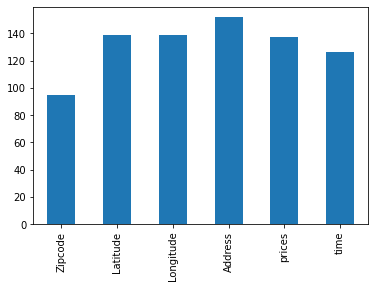

In [34]:
df1.isna().sum().plot(kind = 'bar')
plt.title(" isna on dataset with otsu thresholding and noise clearance ")

In [4]:
import pandas as pd 
import os 
import functions

texts=[]
dfl=[]

for i in ls :
    #text=functions.extract_from_image(i)
    image=functions.clean_image(i)
    text=functions.extract_text(image)
    texts.append(text)
    df=functions.extract_data(text)
    dfl.append(df)
df2=pd.concat(dfl)       
df2  

,Zipcode,Latitude,Longitude,Address,prices,time
0,90804,-118.1357,33.7857,5305 E PACIFIC COAST HWY,NaN,12:53
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN
0,90280,-118.2013,33.9462,10 GARFIELD AVE.,$9,11:19 AM
...,...,...,...,...,...,...
0,30004,-84.3020,34.1124,1805 Parker RD,NaN,NaN
0,71128,NaN,NaN,NaN,NaN,NaN
0,902004306,NaN,NaN,NaN,$2,12:41
0,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'plt' is not defined

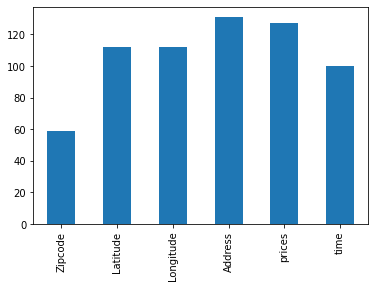

In [5]:
df2.isna().sum().plot(kind = 'bar')
plt.title(" isna on dataset as is ")

In [6]:
for i in df2.columns:
    print("The VALUES of "+ i + str(df2[i].isna().value_counts()))

The VALUES of ZipcodeFalse    141
True      59
Name: Zipcode, dtype: int64
The VALUES of LatitudeTrue     112
False     88
Name: Latitude, dtype: int64
The VALUES of LongitudeTrue     112
False     88
Name: Longitude, dtype: int64
The VALUES of AddressTrue     131
False     69
Name: Address, dtype: int64
The VALUES of pricesTrue     127
False     73
Name: prices, dtype: int64
The VALUES of timeFalse    100
True     100
Name: time, dtype: int64


In [1]:
import os 
ls=[]
url=r"images/large-receipt-image-dataset-SRD/"
for filename in os.listdir(url):
    f = os.path.join(url, filename)
   
    ls.append(f)


In [2]:
ls.pop(0)

'images/large-receipt-image-dataset-SRD/.ipynb_checkpoints'

In [3]:

import pandas as pd 
import os 
import functions

texts=[]
dfl=[]

for i in ls :
    #text=functions.extract_from_image(i)
    image=functions.clean_image(i)
    text=functions.extract_text(image)
    texts.append(text)
    df=functions.extract_data(text)
    dfl.append(df)
dfm=pd.concat(dfl)       
dfm     
    

,Zipcode,Latitude,Longitude,Address,prices,time
0,90804,-118.1357,33.7857,5305 E PACIFIC COAST HWY,NaN,12:53
0,NaN,NaN,NaN,NaN,NaN,NaN
0,378759,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,10:13
0,90280,-118.2013,33.9462,NaN,$9,11:19 AM
...,...,...,...,...,...,...
0,NaN,NaN,NaN,NaN,NaN,NaN
0,71128,NaN,NaN,NaN,$18,6:06
0,902004306,NaN,NaN,NaN,NaN,12:41
0,33140,-80.1337,25.8198,1959 GST,$31.24,NaN


In [4]:
for i in dfm.columns:
    print("The VALUES of "+ i + str(dfm[i].isna().value_counts()))

The VALUES of ZipcodeFalse    146
True      54
Name: Zipcode, dtype: int64
The VALUES of LatitudeTrue     108
False     92
Name: Latitude, dtype: int64
The VALUES of LongitudeTrue     108
False     92
Name: Longitude, dtype: int64
The VALUES of AddressTrue     130
False     70
Name: Address, dtype: int64
The VALUES of pricesTrue     104
False     96
Name: prices, dtype: int64
The VALUES of timeFalse    112
True      88
Name: time, dtype: int64


In [4]:
import run

SyntaxError: invalid syntax (1588209627.py, line 1)

NameError: name 'df' is not defined